## Pengklasteran Data Pelanggan Dealer Menggunakan Metode K-Means

#### Oleh:
Nama : Ismar Apuandi <br>
NIM : 1301194382 <br>
Kelas : IF-43-06 <br>

## 1. Formulasi Masalah

Permasalahan yang dihadapi adalah terdapat sebuah dataset pelanggan di suatu dealer yang didalamnya terdiri dari beberapa kolom yang menunjukkan karakteristik dari masing-masing pelanggan. Kemudian dari dataset tersebut, akan dilakukan pencarian berapa banyak pengelompokkan atau segmentasi yang paling baik untuk kumpulan data pelanggan yang ada. 

## 2. Pembacaan Data

In [8]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.1.5
1.19.5
3.2.2


In [9]:
# data train
!gdown --id 1shnzqn8Fa5-XZLPhW-dV-yUH_qaSpIuR

# data test
!gdown --id 1bwtS-82wOQnW6Zqpufpd_q5qCwqShG3C

Downloading...
From: https://drive.google.com/uc?id=1shnzqn8Fa5-XZLPhW-dV-yUH_qaSpIuR
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bwtS-82wOQnW6Zqpufpd_q5qCwqShG3C
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 73.0MB/s]


In [10]:
# import data train dan test(pada Local Jupyter Notebook)
# df_train = pd.read_csv("Datasets/kendaraan_train.csv")
# df_test = pd.read_csv("Datasets/kendaraan_test.csv")

# import data train dan test(pada google collab)
df_train = pd.read_csv("kendaraan_train.csv")
df_test = pd.read_csv("kendaraan_test.csv")


In [11]:
# Tampilkan data testing
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [12]:
# Tampilkan data training
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [13]:
# drop id dan tertarik pada data training
df_train.drop(columns = ["id","Tertarik"], inplace = True)

# drop kolom tertarik pada data testing
df_test.drop(columns = "Tertarik", inplace = True)

In [14]:
# Concat/ Marge data training dan testing
df_dealer = pd.concat([df_train, df_test], ignore_index = True)
df_dealer

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
333465,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0
333466,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0
333467,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0
333468,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0


## 3. Data Exploration

### 3.1 Informasi Umum Data 

In [15]:
# View Dataset
df_dealer.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
6,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0
7,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0
9,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0


In [16]:
# Melihat informasi shape data
print("Jumlah Record/baris data : ", df_dealer.shape[0])
print("Jumlah kolom data : ", df_dealer.shape[1])

Jumlah Record/baris data :  333470
Jumlah kolom data :  10


In [17]:
# Melihat informasi kolom data
df_dealer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      319030 non-null  object 
 1   Umur               319256 non-null  float64
 2   SIM                319066 non-null  float64
 3   Kode_Daerah        319164 non-null  float64
 4   Sudah_Asuransi     319241 non-null  float64
 5   Umur_Kendaraan     319195 non-null  object 
 6   Kendaraan_Rusak    319282 non-null  object 
 7   Premi              318901 non-null  float64
 8   Kanal_Penjualan    319171 non-null  float64
 9   Lama_Berlangganan  319478 non-null  float64
dtypes: float64(7), object(3)
memory usage: 25.4+ MB


In [18]:
# Melihat jumlah data yang null pada data
print("Jumlah data yang hilang tiap kolom:")
df_dealer.isna().sum()

Jumlah data yang hilang tiap kolom:


Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [19]:
# Melihat jumlah data yang duplikat
print("Jumlah data duplicate: ", df_dealer.duplicated().sum())

Jumlah data duplicate:  239


### 3.2 Identifikasi Jenis Kolom

In [20]:
# Melihat jumlah data unik pada tiap kolom
print("Jumlah data unik tiap kolom:")
df_dealer.nunique()

Jumlah data unik tiap kolom:


Jenis_Kelamin            2
Umur                    66
SIM                      2
Kode_Daerah             53
Sudah_Asuransi           2
Umur_Kendaraan           3
Kendaraan_Rusak          2
Premi                46936
Kanal_Penjualan        151
Lama_Berlangganan      290
dtype: int64

In [21]:
# Melihat data unik pada tiap kolom
print("Data unik tiap kolom:\n")
for col in df_dealer.columns:
    print(col,': ')
    print(df_dealer[col].unique(),'\n')

Data unik tiap kolom:

Jenis_Kelamin : 
['Wanita' 'Pria' nan] 

Umur : 
[30. 48. 21. 58. 50. 33. 23. 20. 54. 25. nan 66. 31. 24. 22. 52. 26. 46.
 41. 45. 29. 68. 73. 27. 34. 60. 44. 47. 75. 38. 35. 53. 71. 59. 57. 65.
 51. 39. 37. 28. 36. 67. 49. 42. 72. 69. 63. 40. 32. 76. 56. 43. 64. 55.
 61. 80. 78. 70. 74. 62. 77. 79. 82. 81. 85. 84. 83.] 

SIM : 
[ 1. nan  0.] 

Kode_Daerah : 
[33. 39. 46. 48. 35.  8. 28. 29. 14. 12. nan 24. 30. 15.  9. 11. 10. 34.
 16.  3. 36. 47. 49. 38. 43. 44.  6. 41. 37. 31. 26. 18. 13. 20. 45. 50.
 32.  2. 21.  7. 52. 17.  4.  0. 25. 23. 40.  5. 27. 19. 42.  1. 22. 51.] 

Sudah_Asuransi : 
[ 1.  0. nan] 

Umur_Kendaraan : 
['< 1 Tahun' '> 2 Tahun' '1-2 Tahun' nan] 

Kendaraan_Rusak : 
['Tidak' 'Pernah' nan] 

Premi : 
[28029. 25800. 32733. ... 16922. 86562. 68474.] 

Kanal_Penjualan : 
[152.  29. 160. 124.  88. 145.  31.  nan  26. 156. 122.   7. 154.  25.
  12.  11. 151. 133. 157.  30.  13.   1.  52.  23.  14.  16. 163.   4.
 138.  55.   8. 155. 125.  24.  2

Dari observasi tersebut dapat dinyatakan bahwa variabel katogoriknya adalah Jenis_Kelamin, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak dan Kanal_Penjualan karena variabel-variabel tersebut bukan hasil pengukuran atau hanya hasil pelabelan. Sedangkan untuk variabel Umur, Premi, dan Lama_Berlangganan adalah hasil pengukuran atau merupakan nilai numerik. 

### 3.3 Visualisasi Data

In [22]:
# Ubah semua type data string/kategorik jadi numeric agar memudahkan EDA dan visualisasi

# Jenis Kelamin
df_dealer["Jenis_Kelamin"] = df_dealer["Jenis_Kelamin"].replace({
    "Wanita" : 0,
    "Pria" : 1
})

# Umur Kendaraan
df_dealer["Umur_Kendaraan"] = df_dealer["Umur_Kendaraan"].replace({
    "< 1 Tahun" : 0,
    "1-2 Tahun" : 1,
    "> 2 Tahun" : 2,
})

# Kendaraan Rusak
df_dealer["Kendaraan_Rusak"] = df_dealer["Kendaraan_Rusak"].replace({
    "Tidak" : 0,
    "Pernah" : 1
})

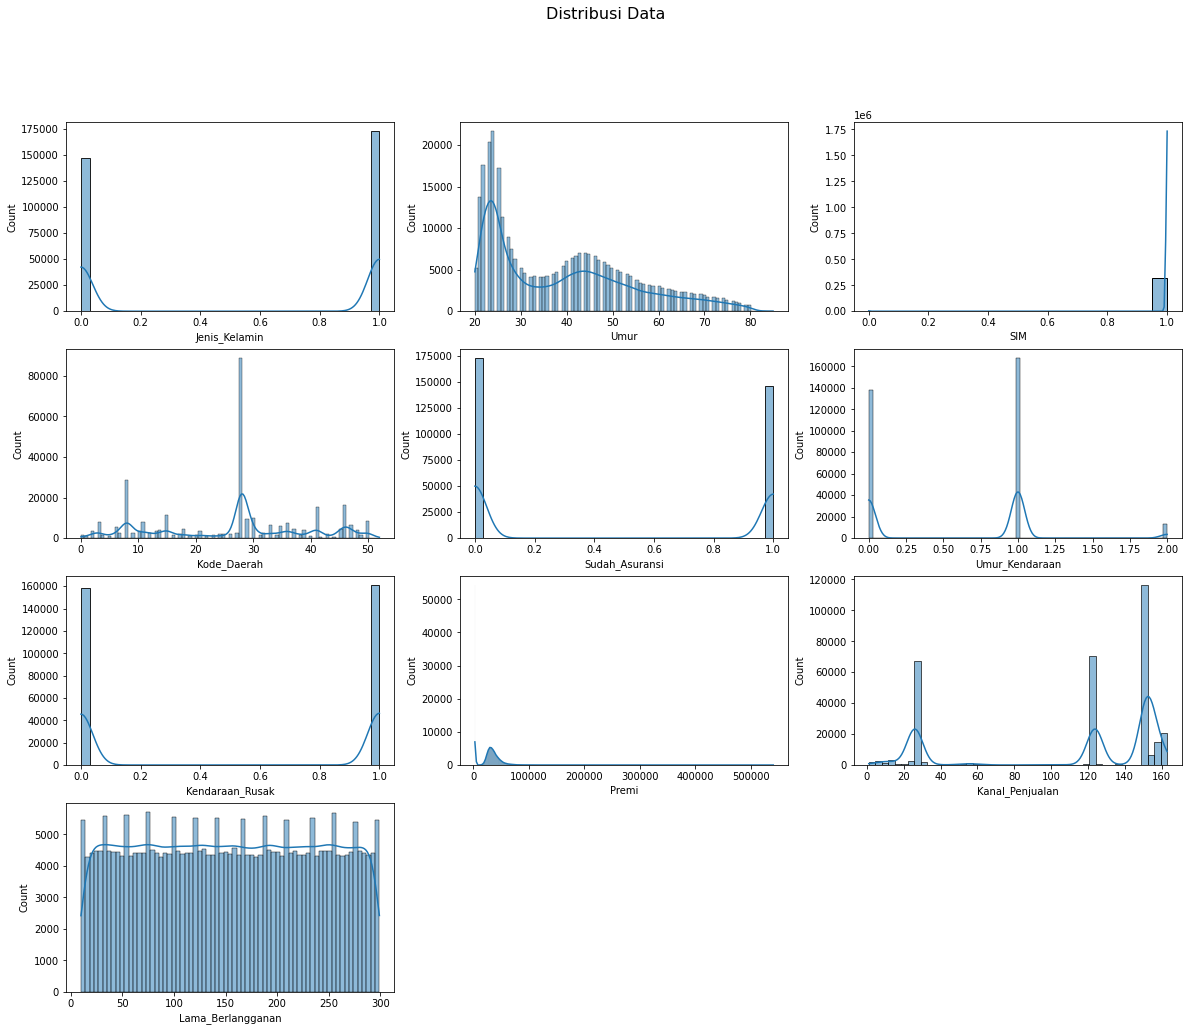

In [23]:
# Melihat distribusi data Tiap kolom
fig, axes = plt.subplots(4,3, figsize=(20,16))
fig.suptitle("Distribusi Data", size = 16)
axes = axes.flatten()
for i, var in enumerate(df_dealer.columns):
    sns.histplot(ax=axes[i], data = df_dealer, x = var,kde=True)

fig.delaxes(ax = axes[10])
fig.delaxes(ax = axes[11]) 

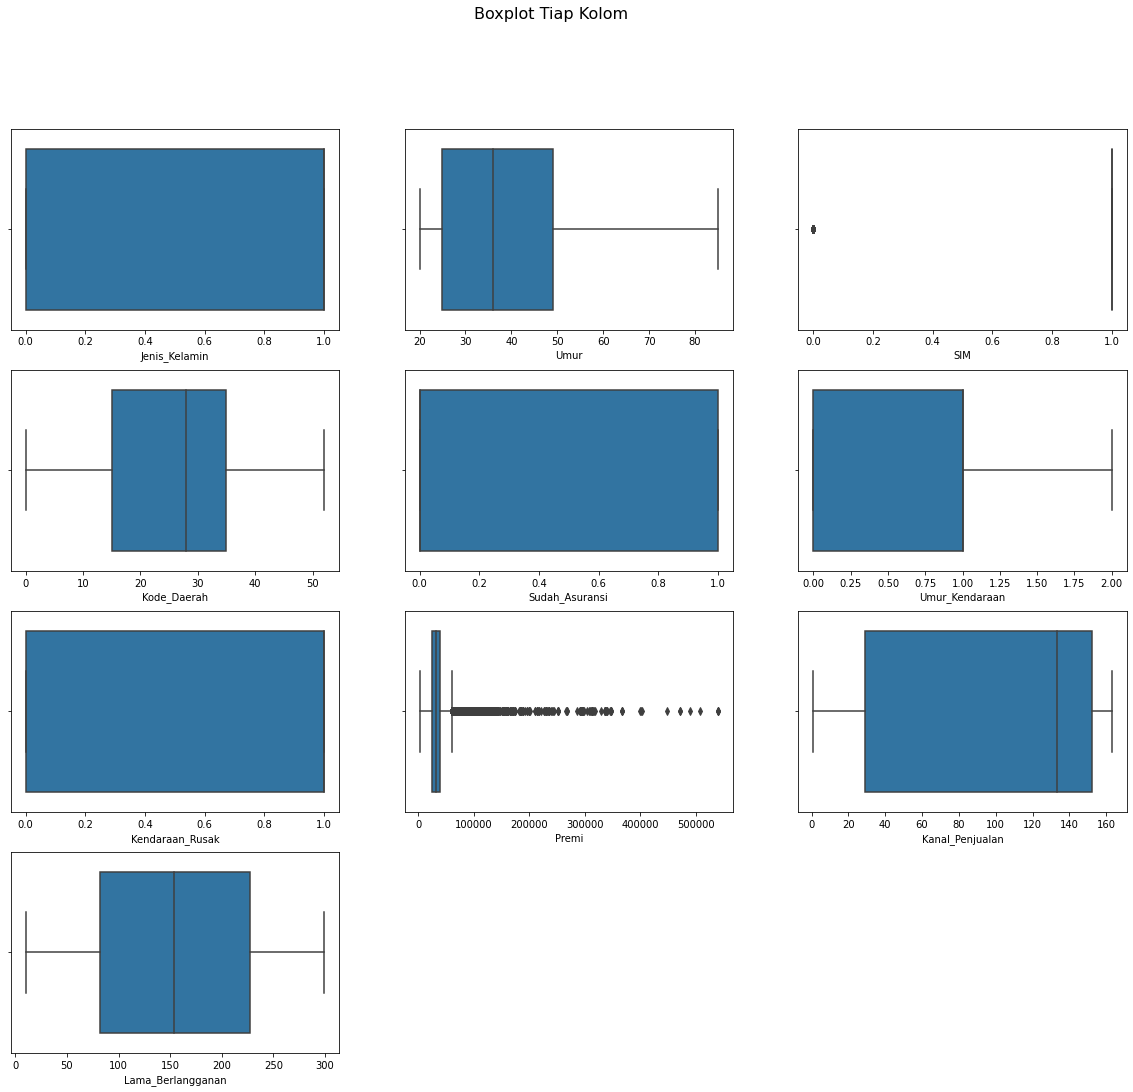

In [24]:
# Melihat Boxplot dataset
fig, axes = plt.subplots(4, 3, figsize=(20, 17))
fig.suptitle("Boxplot Tiap Kolom", size = 16)
axes = axes.flatten()
for i, var in enumerate(df_dealer.columns):
    sns.boxplot(ax=axes[i], data = df_dealer, x = var)

fig.delaxes(ax = axes[10])
fig.delaxes(ax = axes[11])

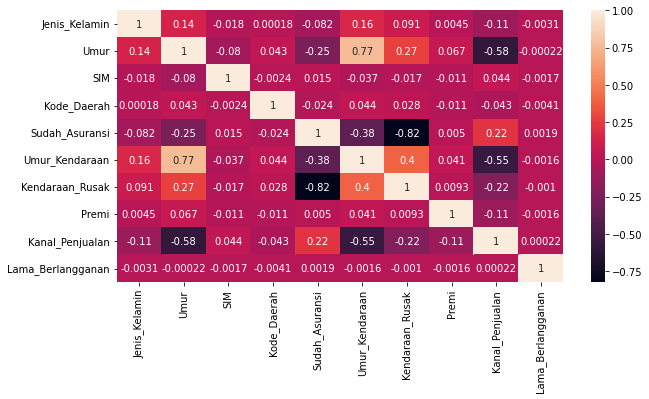

In [25]:
# Melihat Matriks Korelasi antar fitur
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df_dealer.corr(), annot = True, ax = axes)

## 4. Data Preparation

### 4.1 Seleksi Fitur

In [26]:
# Kita lihat dulu deskripsi statistik data
df_dealer.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
count,319030.000000,319256.000000,319066.000000,319164.000000,319241.000000,319195.000000,319282.000000,318901.000000,319171.000000,319478.000000
mean,0.540852,38.840028,0.997859,26.394380,0.458603,0.609417,0.504770,30550.097899,112.045299,154.310350
std,0.498329,15.526398,0.046217,13.246852,0.498284,0.567431,0.499978,17192.548724,54.196470,83.686932
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24397.000000,29.000000,82.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31660.000000,133.000000,154.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39392.000000,152.000000,227.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000


In [27]:
'''
Dari hasil EDA kita akan drop kolom jenis kelamin, SIM, Sudah asuransi, umur kendaraan dan kendaraan rusak karena variasi 
data atau keragaman yang diberikan sangat kecil
'''
df_dealer.drop(columns =["Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Umur_Kendaraan", "Kendaraan_Rusak"], inplace = True)
df_dealer.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,33.0,28029.0,152.0,97.0
1,48.0,39.0,25800.0,29.0,158.0
2,21.0,46.0,32733.0,160.0,119.0
3,58.0,48.0,2630.0,124.0,63.0
4,50.0,35.0,34857.0,88.0,194.0


In [28]:
# Dataframe baru agar memudahkan eksperimen clustering
df_kotor = df_dealer.copy()

### 4.2 Membersihkan Data

In [29]:
# Drop duplicate data
df_kotor.drop_duplicates(inplace = True, ignore_index = True)
print("Jumlah data yang duplikat", df_kotor.duplicated().sum())

Jumlah data yang duplikat 0


In [30]:
# Mengisi NaN value pada data Kode daerah dan Kanal penjualan
'''
karena pada dasarnya atribut kode daerah dan kanal penjualan merupakan hasil pelabelan bukan pengukuran maka
data tersebut dikategorikan data kategorikal(nominal) sehingga untuk mengisi nan value bisa menggunakan nilai modus
'''

df_kotor["Kode_Daerah"] = df_kotor["Kode_Daerah"].fillna(df_kotor["Kode_Daerah"].mode()[0])
df_kotor["Kanal_Penjualan"] = df_kotor["Kanal_Penjualan"].fillna(df_kotor["Kanal_Penjualan"].mode()[0])

df_kotor.isna().sum()


Umur                 14117
Kode_Daerah              0
Premi                14166
Kanal_Penjualan          0
Lama_Berlangganan    13451
dtype: int64

In [31]:
# Mengisi NaN value pada data numeric
'''
Dari hasil persebaran data di EDA hanya terdapat 3 kolom yang sifatnya numeric yaitu Umur,Premi dan Lama_Berlangganan.
1. untuk umur dan premi karena persebarannya tidak seimbang/condong ke salah satu kita gunakan median
2. untuk lama berlangganan karena persebarannya sudah merata kita gunakan mean 
'''

df_kotor['Umur'] = df_kotor['Umur'].fillna(df_kotor['Umur'].median())
df_kotor['Premi'] = df_kotor['Premi'].fillna(df_kotor['Premi'].median())
df_kotor['Lama_Berlangganan'] = df_kotor['Lama_Berlangganan'].fillna(df_kotor['Lama_Berlangganan'].mean())

df_kotor.isna().sum()

Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [32]:
# Menghandle Outlier
'''
dari hasil EDA dan pemilihan fitur, masih terdapat kolom yang memiliki outlier yaitu Premi, sehingga disini kita 
akan mencoba menghilangkan outlier yang ada 
'''

# Fungsi untuk menghandle outlier pada data
def deleteOutlier(df, attribute):
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1
    
    # ganti outlier dengan Q1 atau Q3
    df.loc[df[attribute]>(Q3+1.5*IQR),attribute] = Q3
    df.loc[df[attribute]<(Q1-1.5*IQR),attribute] = Q1
    
    return df

# Menghilangkan Outlier pada premi
df_kotor = deleteOutlier(df_kotor, 'Premi')

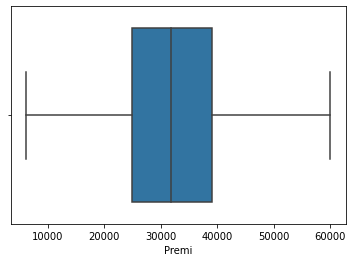

In [33]:
# Melihat kembali outlier pada atribute Premi pada boxplot
sns.boxplot(data = df_kotor, x = "Premi")
plt.show()

### 4.3 Normalisasi Data

In [34]:
# Melakukan normalisasi dengan min max scaler
for col in df_kotor.columns:
    df_kotor[col] = (df_kotor[col] - df_kotor[col].min())/(df_kotor[col].max() - df_kotor[col].min())

df_kotor.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.406793,0.932099,0.301038
1,0.430769,0.750000,0.365447,0.172840,0.512111
2,0.015385,0.884615,0.494046,0.981481,0.377163
3,0.584615,0.923077,0.349959,0.759259,0.183391
4,0.461538,0.673077,0.533443,0.537037,0.636678


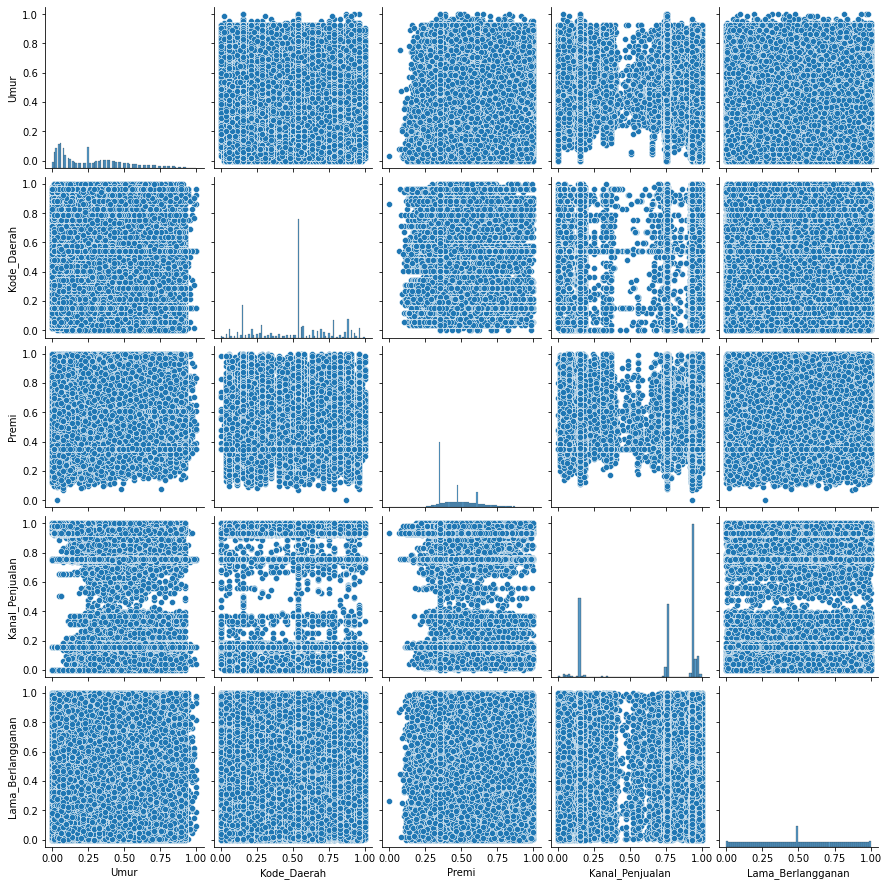

In [35]:
# Lihat persebaran data antar kolom setelah normalisasi
sns.pairplot(df_kotor)

In [36]:
# Eksport data bersih hasil preprocessing
df_bersih = df_kotor.copy()
df_bersih.to_csv('Hasil_Preprocess_Kendaraan_1301194382.csv',index=False)

## 5. Modeling: K-Means Clustering

Terdapat beberapa langkah yang digunakan dalam algoritma KMeans dalam notebook ini yaitu:
1. Melakukan inisialisasi k buah centroid secara random pada dataset
2. Untuk Setiap titik pada data cari jarak centroid terdekat yang sudah dibuat sebelumnya
3. Tentukan letak centroid baru dengan menghitung rata-rata tiap titik dari masing2 centroidnya
4. langkah 2 dan 3 diulang sampai nilai error/pergerakan centroid tidak berubah

### 5.1 Fungsi Inisialisasi Centroid

In [37]:
# Fungsi membuat inisialisasi awal centroid
def initCentroids(data, k):
    isDuplicated = True
    while(isDuplicated):
        randomIdx = np.random.choice(data.shape[0], k, replace = False)
        centroids = pd.DataFrame([data[i,:2] for i in randomIdx], columns = ["x","y"])
        
        if(True in centroids.duplicated().tolist()):
            isDuplicated = True
        else:
            isDuplicated = False
        
    return np.array(centroids)

### 5.2 Fungsi Mencari Centroid Terdekat

In [38]:
# Perhitungan jarak dengan euclidean
def calculateDistance(centroid,dataPoint):
    return np.sqrt(np.sum((centroid - dataPoint) ** 2))

# Fungsi pencarian centroid terdekat
def centroidAssign(centroids, data):
    numOfPoints = data.shape[0]
    k = centroids.shape[0]
    centroidAssign = []
    centroidDistance = []
    
    for eachPoint in range(numOfPoints):
        # inisialisasi jarak tiap titik dengan tiap centroid
        distanceList = np.array([])
        
        # Menghitung jarak tiap titik dengan centroid
        for i in range(k):
            distance = calculateDistance(centroids[i,:2], data[eachPoint,:2])
            distanceList = np.append(distanceList, distance)
        
        # Menghitung centroid terdekat
        closestCentroid = np.where(distanceList == np.amin(distanceList))[0].tolist()[0]

        # Meng-assign centroid terdekat ke tiap data
        centroidAssign.append(closestCentroid)
        centroidDistance.append(np.amin(distanceList))
    
    return centroidAssign, centroidDistance

### 5.3 Fungsi Mengupdate Centroid

In [39]:
def centroidMean(data, k):
    newCentroids = np.array([])
    
    for i in range (k):
        cluster = data[data[:,2] == i]
        newCen = np.mean(cluster[:,:2], axis = 0)
        newCentroids = np.append(newCentroids, newCen)

    return newCentroids.reshape(k,2)

### 5.4 Fungsi Utama K-Means

In [40]:
def KMeans(data, k, maxIter):     
    # centroid awal
    newCentroid = initCentroids(data,k)
    
    # total jarak untuk perubahan tiap centroid
    totalDistance = []
    
    # lakukan cluster ?
    doCluster = True
    i = 0
    
    # Menambah kolom centroid dan jarak
    if(data.shape[1] < 3):
        data = np.insert(data, 2, np.zeros(data.shape[0]), axis = 1)
        data = np.insert(data, 3, np.zeros(data.shape[0]), axis = 1)
    
    # Selama centroid bergerak lakukan clustering
    while((doCluster) and (i < maxIter)):
        # Melakukan Assign centroid ke tiap titik data
        dataCentroid, dataDistance = centroidAssign(newCentroid[:,:2], data[:,:2])
        data[:,2], data[:,3] = dataCentroid, dataDistance
        totalDistance.append(np.sum(data[:,3]))
        
        # Mengecek total jarak centroid skrg dengan sebelumnya
        if(len(totalDistance) < 2):
            doCluster = True
        else:
            if(round(totalDistance[i],4) != round(totalDistance[i - 1],4)):
                doCluster = True
            else:
                doCluster = False
        
        # Mengecek jika ada centroid yang tidak terpilih
        if(len(np.unique(data[:,2])) != k):
            # cari centroid lain dari awal
            i = 0
            newCentroid = initCentroids(data,k)
            totalDistance = []
        else:
            # Menghitung rata2 tiap centroid sebagai centroid baru
            newCentroid = centroidMean(data, k) 
            i += 1
        
    return data, newCentroid    
    

### 5.5 Melakukan Clustering pada Dataset

In [41]:
# Ambil 2 fitur yang akan di cluster
dataCluster = df_bersih.loc[:50000, ['Premi','Lama_Berlangganan']].to_numpy()
dataCluster

array([[0.40679255, 0.30103806],
       [0.3654474 , 0.51211073],
       [0.49404585, 0.37716263],
       ...,
       [0.42142751, 0.94117647],
       [0.8446357 , 0.183391  ],
       [0.65336103, 0.89619377]])

Text(0, 0.5, 'Lama_Berlangganan')

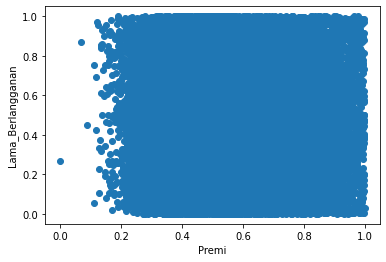

In [42]:
# Plot Awal sebelum clustering
plt.scatter(x = dataCluster[:,0], y = dataCluster[:,1])
plt.xlabel('Premi')
plt.ylabel('Lama_Berlangganan')

In [43]:
# Clustering dengan jumlah centroid perkiraan k = 3
k = 3
maxIter = 50
dataCluster, centroids =  KMeans(dataCluster, k, maxIter)
dataCluster

array([[0.40679255, 0.30103806, 0.        , 0.16363351],
       [0.3654474 , 0.51211073, 2.        , 0.13773754],
       [0.49404585, 0.37716263, 2.        , 0.12562031],
       ...,
       [0.42142751, 0.94117647, 1.        , 0.133035  ],
       [0.8446357 , 0.183391  , 0.        , 0.34569754],
       [0.65336103, 0.89619377, 1.        , 0.16325145]])

In [44]:
# Tampilkan Hasil Cluster
def showCluster(dat, centroids, colX, colY, showDf = False):
    df = pd.DataFrame(dat, columns=[colX, colY, "Centroid", "Jarak"])
    if(showDf):
        print("----------------Detail Hasil Cluster------------------\n")
        print(df)
        print("-------------------------------------------------------")

    
    colors = {0:'c', 1:'m', 2:'r', 3:'g', 4:'y',5:'lawngreen',6:'deeppink'}
    
    # Plot data
    plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
                c = df['Centroid'].apply(lambda x: colors[x]), alpha = 0.5)

    # Plot Centroid
    plt.scatter(centroids[:,0], centroids[:,1],  marker = 'o', s=100, c = "k")

    plt.xlabel(colX)
    plt.ylabel(colY)
    plt.title('Plot Hasil Cluster')
    plt.show()
    print("-------------------------------------------------------")

----------------Detail Hasil Cluster------------------

          Premi  Lama_Berlangganan  Centroid     Jarak
0      0.406793           0.301038       0.0  0.163634
1      0.365447           0.512111       2.0  0.137738
2      0.494046           0.377163       2.0  0.125620
3      0.349959           0.183391       0.0  0.150407
4      0.533443           0.636678       2.0  0.137647
...         ...                ...       ...       ...
49996  0.346268           0.688581       1.0  0.213861
49997  0.364520           0.809689       1.0  0.139750
49998  0.421428           0.941176       1.0  0.133035
49999  0.844636           0.183391       0.0  0.345698
50000  0.653361           0.896194       1.0  0.163251

[50001 rows x 4 columns]
-------------------------------------------------------


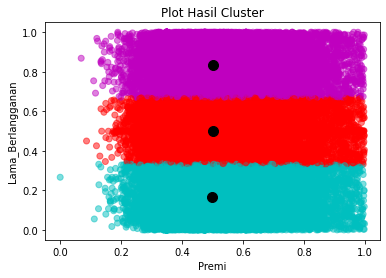

-------------------------------------------------------


In [45]:
showCluster(dataCluster, centroids, 'Premi', 'Lama_Berlangganan', showDf = True)

### 5.6 Melakukan Evaluasi dengan Elbow Method

In [46]:
# perhitungan squared error untuk evaluasi Elbow
def squaredError(centroid, dataPoint):
    return np.sum((centroid - dataPoint) ** 2)

# fungsi elbow Method scratch
def elbowMethod(data, n, iterLimit):
    wcssList = []

    for i in range(1, (n+1)):
        clusterRes, newCentroid = KMeans(data, i, iterLimit)
        wcss = 0
        # hitung SSE
        for j in range(clusterRes.shape[0]):
            for k in range(newCentroid.shape[0]):
                if(clusterRes[j,2] == k):
                    d = squaredError(newCentroid[k,:2], clusterRes[j,:2])
                    wcss += d
        wcssList.append(wcss)

    plt.plot(range(1,n+1), wcssList)
    plt.xlabel('Cluster')
    plt.ylabel('WCSS')
    plt.show()

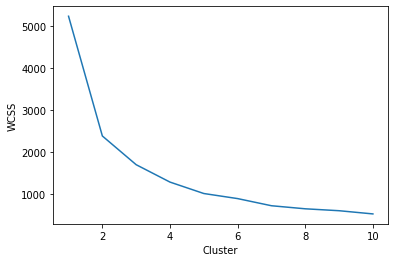

In [47]:
# Melakukan evaluasi clustering dengan elbow Method
elbowMethod(dataCluster, 10, maxIter)

## 6. Eksperimen

### 6.1 Percobaan dari Hasil Evaluasi

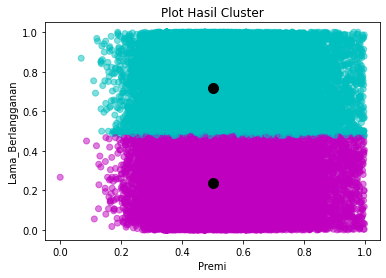

-------------------------------------------------------


In [48]:
'''
dari hasil elbow method didapat sekitar cluster dengan jumlah 2 lah yang memberikan hasil terbaik berdasarkan
tingkat penurunan sum of squared error dari seluruh jumlah cluster
'''
# untuk k = 2
k = 2
maxIter = 50
dataEval, centroidsEval =  KMeans(dataCluster, k, maxIter)
showCluster(dataEval, centroidsEval, "Premi", "Lama_Berlangganan")

### 6.2 Percobaan dengan Jumlah Data yang Berbeda

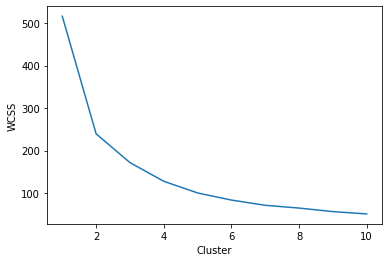

In [49]:
# Nilai Wcss untuk 5000 data 
dataEksperimen = dataCluster[:5000]
elbowMethod(dataEksperimen, 10, maxIter)

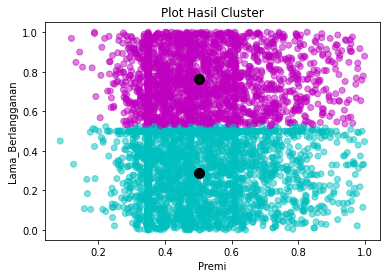

-------------------------------------------------------


In [50]:
'''
melihat persebaran cluster untuk jumlah data 5000
'''
k = 2
maxIter = 50
dataEksperimen, centroidsEksperimen =  KMeans(dataEksperimen, k, maxIter)
showCluster(dataEksperimen, centroidsEksperimen, "Premi", "Lama_Berlangganan")

### 6.3 Percobaan dengan Metode Handle NaN yang Berbeda

In [51]:
'''
Perubahan handle NaN:
1. Premi --> Median --> Modus
2. Lama Berlangganan --> Mean --> Modus
'''

# Ambil data sebelum dibersihkan
df_diffNan = df_dealer.copy()

# Ambil premi dan lama berlangganan saja
df_diffNan = df_diffNan[["Premi", "Lama_Berlangganan"]]

# Handle NaN
df_diffNan['Premi'] = df_diffNan['Premi'].fillna(df_diffNan['Premi'].mode()[0])
df_diffNan['Lama_Berlangganan'] = df_diffNan['Lama_Berlangganan'].fillna(df_diffNan['Lama_Berlangganan'].mode()[0])

# Tampilkan Jumlah Nan
df_diffNan.isna().sum()

Premi                0
Lama_Berlangganan    0
dtype: int64

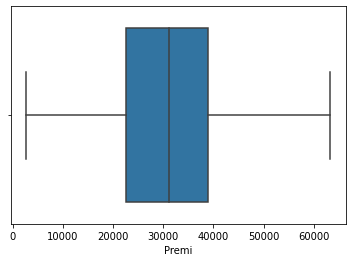

In [52]:
# Menghilangkan Outlier pada premi
df_diffNan = deleteOutlier(df_diffNan, "Premi")
sns.boxplot(x = df_diffNan["Premi"])

In [53]:
# Melakukan normalisasi dengan min max scaler
for col in df_diffNan.columns:
    df_diffNan[col] = (df_diffNan[col] - df_diffNan[col].min())/(df_diffNan[col].max() - df_diffNan[col].min())


In [54]:
# Ambil 5000 data
dataEksperimen2 = df_diffNan.iloc[:5000, :].to_numpy() 
dataEksperimen2.shape

(5000, 2)

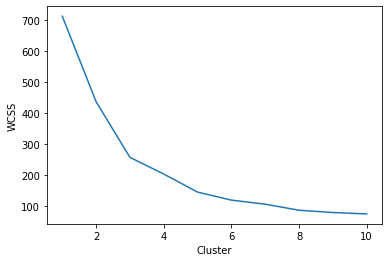

In [55]:
# Evaluasi k terbaik dari Elbow Method
elbowMethod(dataEksperimen2, 10, maxIter)

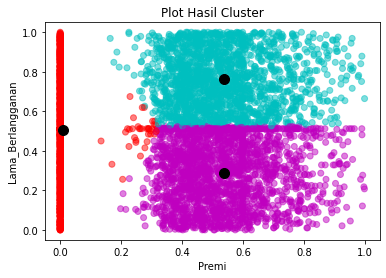

-------------------------------------------------------


In [56]:
# Clustering 
k = 3
maxIter = 50
dataEksperimen2, centroidsEksperimen2 =  KMeans(dataEksperimen2, k, maxIter)
showCluster(dataEksperimen2, centroidsEksperimen2, "Premi", "Lama_Berlangganan")

## 7. Kesimpulan

1. Dari hasil Ekplorasi dan persiapan data, dataset bersih yang dapat digunakan untuk proses klasterisasi adalah data umur, kode daerah, premi, kanal penjualan dan lama berlangganan
2. Data yang dipilih dalam percobaan pengklasteran pada data pelanggan adalah data premi dengan lama berlangganan. 
3. Dari data premi dan lama berlangganan diperoleh hasil atau jumlah klaster terbaik sebanyak 2 buah klaster atau k = 2 untuk 50.000 data dari 333.470 data
4. Untuk percobaan sebanyak 5000 data premi dan lama berlangganan, diperoleh jumlah klaster terbaik yang sama dengan jumlah data sebanyak 50.000 yaitu 2 buah klaster.
4. Pengubahan metode pengisian missing value pada data premi dan lama berlangganan menyebabkan perubahan klaster terbaik yang diperoleh yaitu menjadi 3 buah klaster. 


## Thank You